# Optimization Project (1) - Visualization of Gradient Descent

We implement the animation package from matplotlib to visualize the path of optimization of the gradient descent method.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import HTML

In [2]:
"""

Functions below are the same functions used in our project.
They are pasted here for reference in creating the animation functions.

"""




def getContour(x_min, x_max,y_min, y_max, func, cache, step):
    
    """
    Function to plot the contour plot of the function
    """
    
    xs = np.linspace(x_min,x_max,500)
    ys = np.linspace(y_min,y_max,500)
    XS,YS = np.meshgrid(xs,ys)
    ZS = func([XS,YS])

    # plot contour
    fig = plt.figure(figsize=(8,8))
    levels = np.arange(np.min(ZS), np.max(ZS), step)
    plt.contour(XS,YS,ZS, levels=levels,cmap = 'twilight')
    plt.xlabel('X')
    plt.ylabel('Y')
    
    cache = np.array(cache)
    plt.plot(cache[:,0],cache[:,1],'ro-')
    plt.plot(cache[-1,0],cache[-1,1],'ko')
    
def get3Dplot(x_min, x_max, y_min, y_max, func):
    
    """
    Function to plot the 3D plot of function
    """
    
    xs = np.linspace(x_min,x_max,500)
    ys = np.linspace(y_min,y_max,500)
    XS,YS = np.meshgrid(xs,ys)
    ZS = func([XS,YS])

    # plot 3D
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection = '3d')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('f(x,y)')
    ax.contour3D(XS,YS,ZS,200,cmap='twilight')
    ax.view_init(ax.elev, ax.azim-40)
    plt.show()
    
def f1(x):
    
    """
    Function dependent on x and y
    """
        
    return 2*x[0]**2 + 3/2 * x[1]**2 + x[0]*x[1] - x[0] - 2*x[1] + 7.9

def gd(f, df,x0, N=1000):
    
    """
    An algorithm for gradient descent
    
    Parameters:
        f - function to be minimized (function)
        x0 - initial position (list)
        N - maximum number of iterations (int)
        
    Returns:
        converged - True if f is minimized else False (boolean)
        x_hist - steps taken in attempt to minimize f (array)
        f(x_now) - function value of minima (float)
    """
    
    x_now = x0
    x_prev = None
    converged = False
    x_hist = []
    x_hist.append(x_now)
    
    
    for i in range(N):
        
        df_now = df(x_now)
        
        if x_prev is None: # initialize step size for first iteration
            gamma = 0.001 
        else: # use eqn (?) to update gamma iteratively 
            df_prev = df(x_prev)
            gamma = np.dot(x_now-x_prev, df_now-df_prev) / np.linalg.norm(df_now-df_prev)**2
        x_next = x_now - gamma*df_now
        
        if abs(f(x_next)-f(x_now)) < 1e-4:
            converged = True
            break
        else:
            x_prev = x_now
            x_now = x_next
            x_hist.append(x_now)
            
    return converged, np.array(x_hist), f(x_now)

def df1(x):
    
    """
    Gradient of function 1
    """
    
    return np.array([4*x[0]+x[1]-1,3*x[1]+x[0]-2])

def init(x_min, x_max, y_min, y_max):
    
    """
    Initialize starting position
    """
    
    x0 = x_min+np.random.random()*(x_max-x_min)
    y0 = y_min+np.random.random()*(y_max-y_min)
    return [x0, y0]

"\ncache = np.array(cache)\nplt.plot(cache[:,0],cache[:,1],'ro-')\nplt.plot(cache[-1,0],cache[-1,1],'ko')\n"

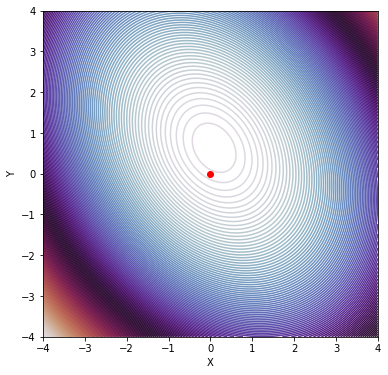

In [3]:
"""

Pseudo-contour plot (before animation)

Need to set the figure and frames before implementing the animation code. 
This is what the below code does - initializes the animation frame.

"""    
    
xs = np.linspace(-4,4,500)
ys = np.linspace(-4,4,500)
XS,YS = np.meshgrid(xs,ys)
ZS = f1([XS,YS])

# plot contour
fig = plt.figure(figsize=(6,6))
levels = np.arange(np.min(ZS), np.max(ZS), 0.5)
plt.contour(XS,YS,ZS, levels=levels,cmap = 'twilight')
plt.xlabel('X')
plt.ylabel('Y')
N=10

x_hist, = plt.plot([0], [0], 'ro-')
"""
cache = np.array(cache)
plt.plot(cache[:,0],cache[:,1],'ro-')
plt.plot(cache[-1,0],cache[-1,1],'ko')
"""

In [4]:

x_min, x_max, y_min, y_max = -4, 4, -4, 4
x0 = init(x_min, x_max, y_min, y_max)
x_prev = None

def anim_init():
    x_hist.set_data([],[])
    return x_hist,
    
def animate(x):
    
    """
    Visualisation of gradient descent optimization
    
    """
    #x_min, x_max, y_min, y_max = -4, 4, -4, 4
    #x0 = init(x_min, x_max, y_min, y_max)
    #N = 10
    global x0
    global x_prev
    x_now = x0
    converged = False
    #x_hist = []
    #x_hist.append(x_now)
    #x_hist.set_data(x0[0],x0[1])
    
    
    #for i in range(N):
        
    df_now = df1(x_now)
        
    if x_prev is None: # initialize step size for first iteration
        gamma = 0.001 
    else: # use eqn (?) to update gamma iteratively 
        df_prev = df1(x_prev)
        gamma = np.dot(x_now-x_prev, df_now-df_prev) / np.linalg.norm(df_now-df_prev)**2
    x_next = x_now - gamma*df_now
        
    if abs(f1(x_next)-f1(x_now)) < 1e-4:
        converged = True
        #break
    else:
        x_prev = x_now
        x_now = x_next
        #x_hist.append(x_now)
        x0 = x_now
    x_hist.set_data(x_now[0], x_now[1])
            
    return x_hist,

In [5]:
particle_anim = animation.FuncAnimation(fig, animate, init_func=anim_init, frames=N, interval=300, blit=False, repeat=True)
HTML(particle_anim.to_jshtml())